# Planet Viewing Example

This example shows how to plot geometric quantities using the frames system.


First we import numpy and the plotting module.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Then we import GODOT modules and create a universe from configuration.

The [universe](./universe.yml) contains an entry to insert a keplerian orbit point, named 'SC' into the frames system.

In [1]:
from godot.core import tempo, astro
from godot import cosmos

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

# create the universe
uni_config = cosmos.util.load_yaml('universe2.yml')
uni = cosmos.Universe(uni_config)

We can check that the SC, and some planets are contained in the frames system:

In [2]:
#for p in uni.frames.listPointNames():
    #print(f"Frames contains point {p}") 

In [3]:
#for a in uni.frames.listAxesNames():
#   print(f"Frames contains axes {a}")

# Occultation Times

We want to compute the times when Mars is in occultation due to the Earth, as viewed from the spacecraft.

We can extract from the universe a time evaluable function for this purpose. In the  [universe file](./universe.yml) there are geometry functions added for occultations:

In [4]:
uni.evaluables.contains("SC_NN_Moon_Occultation_Geometric")

True

We can plot this function:

In [5]:
#Setup
uni_config = cosmos.util.load_yaml('universe2.yml')
uni = cosmos.Universe(uni_config)
sc = uni.spacecraft["GeoSat"]

import godot
from godot.model import eventgen

gs = godot.model.obs.SpacecraftParticipant

# specify a time grid
ep1 = tempo.Epoch('2026-04-01T00:00:00 TDB')
ep2 = tempo.Epoch('2026-05-01T00:00:00 TDB')
ran = tempo.EpochRange( ep1, ep2 )
grid = ran.createGrid(30.0) # 60 seconds stepsize
eps = 1e-6
tol = 1e-6
event_grid = ran.contract(eps).createGrid(30.0)

In [ ]:
# get the time evaluable for the occulation distance of Mars by Earth
model = uni.evaluables["New_Norcia_Moon_Elevation"]
min_value = 0
fig = plt.figure(figsize=(9, 5))
plt.title('SC NN Elevation')
plt.xlabel('Time (MJD)')
plt.ylabel('SC NN angle')
times = [e.mjd() for e in grid]
values = [model.eval(e) for e in grid]
plt.plot(times, values)
plt.plot(times,[min_value]*len(times),'--')
plt.tight_layout()

RuntimeError: 
Exception raised in GODOT: 
What : Entry 'NN_Moon_Elevation' not present in Book<std::shared_ptr<godot::model::interface::TimeEvaluableT<1> >>!
Available entries:
'AU' 'AmaltheaFlattening' 'AmaltheaGM' 'AmaltheaRadius' 'ArielFlattening' 'ArielGM' 'ArielRadius' 'CallistoFlattening' 'CallistoGM' 'CallistoRadius' 'CallistoSOI' 'Cebreros_Moon_Elevation' 'CelsiusToKelvin' 'CeresFlattening' 'CeresGM' 'CeresRadius' 'CharonFlattening' 'CharonGM' 'CharonRadius' 'DegreePerRadian' 'DeimosFlattening' 'DeimosGM' 'DeimosRadius' 'DioneFlattening' 'DioneGM' 'DioneRadius' 'EarthBarycenterFlattening' 'EarthBarycenterGM' 'EarthBarycenterRadius' 'EarthBarycenterSOI' 'EarthEllipsoidAngularVelocity' 'EarthEllipsoidFlattening' 'EarthEllipsoidGM' 'EarthEllipsoidMeanRadius' 'EarthEllipsoidPolarRadius' 'EarthEllipsoidSemiMajorAxis' 'EarthEllipsoidVolumetricRadius' 'EarthFlattening' 'EarthGM' 'EarthJ2' 'EarthRadius' 'EarthSOI' 'EnceladusFlattening' 'EnceladusGM' 'EnceladusRadius' 'ErisGM' 'EuropaFlattening' 'EuropaGM' 'EuropaRadius' 'EuropaSOI' 'GanymedeFlattening' 'GanymedeGM' 'GanymedeRadius' 'GanymedeSOI' 'GeoSat_main_isp' 'GeoSat_main_thrust' 'GeoSat_mass' 'GeoSat_srp_area' 'GeoSat_srp_cr' 'GoldenRatio' 'HalfPi' 'HimaliaFlattening' 'HimaliaGM' 'HimaliaRadius' 'HyperionFlattening' 'HyperionGM' 'HyperionRadius' 'IapetusFlattening' 'IapetusGM' 'IapetusRadius' 'IoFlattening' 'IoGM' 'IoRadius' 'IoSOI' 'JupiterBarycenterFlattening' 'JupiterBarycenterGM' 'JupiterBarycenterRadius' 'JupiterBarycenterSOI' 'JupiterFlattening' 'JupiterGM' 'JupiterJ2' 'JupiterRadius' 'JupiterSOI' 'Lbary' 'Lgeo' 'Malargue_Moon_Elevation' 'MarsBarycenterFlattening' 'MarsBarycenterGM' 'MarsBarycenterRadius' 'MarsBarycenterSOI' 'MarsFlattening' 'MarsGM' 'MarsJ2' 'MarsRadius' 'MarsSOI' 'MercuryBarycenterFlattening' 'MercuryBarycenterGM' 'MercuryBarycenterRadius' 'MercuryBarycenterSOI' 'MercuryFlattening' 'MercuryGM' 'MercuryJ2' 'MercuryRadius' 'MercurySOI' 'MimasFlattening' 'MimasGM' 'MimasRadius' 'MirandaFlattening' 'MirandaGM' 'MirandaRadius' 'MoonFlattening' 'MoonGM' 'MoonJ2' 'MoonRadius' 'MoonSOI' 'NeptuneBarycenterFlattening' 'NeptuneBarycenterGM' 'NeptuneBarycenterRadius' 'NeptuneBarycenterSOI' 'NeptuneFlattening' 'NeptuneGM' 'NeptuneJ2' 'NeptuneRadius' 'NeptuneSOI' 'New_Norcia_Moon_Elevation' 'OberonFlattening' 'OberonGM' 'OberonRadius' 'PallasGM' 'PhobosFlattening' 'PhobosGM' 'PhobosRadius' 'PhoebeFlattening' 'PhoebeGM' 'PhoebeRadius' 'Pi' 'PlutoBarycenterFlattening' 'PlutoBarycenterGM' 'PlutoBarycenterRadius' 'PlutoBarycenterSOI' 'PlutoFlattening' 'PlutoGM' 'PlutoRadius' 'PlutoSOI' 'ProteusFlattening' 'ProteusGM' 'ProteusRadius' 'RadianPerDegree' 'RheaFlattening' 'RheaGM' 'RheaRadius' 'SC_NN_Earth_Occultation_Geometric' 'SC_NN_Moon_Occultation_Geometric' 'SaturnBarycenterFlattening' 'SaturnBarycenterGM' 'SaturnBarycenterRadius' 'SaturnBarycenterSOI' 'SaturnFlattening' 'SaturnGM' 'SaturnJ2' 'SaturnRadius' 'SaturnSOI' 'SpeedOfLight' 'SpeedOfLightSquared' 'StandardAccelerationOfGravity' 'SunFlattening' 'SunGM' 'SunRadius' 'SunSOI' 'TethysFlattening' 'TethysGM' 'TethysRadius' 'ThebeFlattening' 'ThebeGM' 'ThebeRadius' 'TitanFlattening' 'TitanGM' 'TitanRadius' 'TitaniaFlattening' 'TitaniaGM' 'TitaniaRadius' 'TritonFlattening' 'TritonGM' 'TritonRadius' 'TwoPi' 'UmbrielFlattening' 'UmbrielGM' 'UmbrielRadius' 'UniversalGravitationalConstant' 'UranusBarycenterFlattening' 'UranusBarycenterGM' 'UranusBarycenterRadius' 'UranusBarycenterSOI' 'UranusFlattening' 'UranusGM' 'UranusJ2' 'UranusRadius' 'UranusSOI' 'VenusBarycenterFlattening' 'VenusBarycenterGM' 'VenusBarycenterRadius' 'VenusBarycenterSOI' 'VenusFlattening' 'VenusGM' 'VenusJ2' 'VenusRadius' 'VenusSOI' 'VestaFlattening' 'VestaGM' 'VestaRadius' 'meanSolarRadiationPressure1AU' 
Func : get
Src  : /builds/godot/godotpy/godot/godot/core/util/Book.h
Line : 136


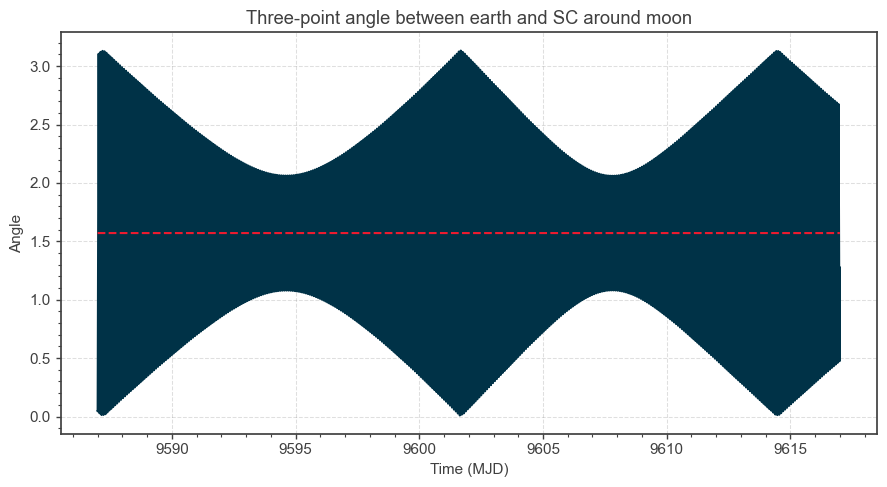

In [ ]:
# get the time evaluable for the occulation distance of Mars by Earth
model = uni.evaluables["AngleMoonkel"]
min_value = uni.evaluables["HalfPi"]
i = uni.frames.listPointNames()
#for x in i:
    #print(x)

fig = plt.figure(figsize=(9, 5))
plt.title('Three-point angle between earth and SC around moon')
plt.xlabel('Time (MJD)')
plt.ylabel('Angle')
times = [e.mjd() for e in grid]
values = [model.eval(e) for e in grid]
#Ineffective, går nok for nu
pihalf = [min_value.eval(e) for e in grid]
plt.plot(times, values)
plt.plot(times,pihalf,'--')
plt.tight_layout()

It looks like this function drops below zero in this time period, which means that Mars is occulted by the Earth. We can find the exact times of these occultations as follows:

Create an event generator for when this function drops below a minimum value (zero here)

In [ ]:
model = uni.evaluables["AngleMoonkel"]
min_value = 3.1415/2
func = model - min_value
generator1 = eventgen.EventGenerator(func, eps, tol) # use negative to compute periods with no visibility

moon_occult = generator1.computeEventIntervals(event_grid)
for interval in moon_occult:
    start = interval.start().value()
    end = interval.end().value()
    print( f"In view from {start} to {end}, duration {end - start} secs" )

In view from 2026-04-01T00:28:33.625900 TDB to 2026-04-01T01:25:08.706412 TDB, duration 3395.080511701686 secs
In view from 2026-04-01T02:21:43.581377 TDB to 2026-04-01T03:18:18.651999 TDB, duration 3395.0706226108914 secs
In view from 2026-04-01T04:14:53.518233 TDB to 2026-04-01T05:11:28.581157 TDB, duration 3395.062924280573 secs
In view from 2026-04-01T06:08:03.440793 TDB to 2026-04-01T07:04:38.498190 TDB, duration 3395.0573977262657 secs
In view from 2026-04-01T08:01:13.353343 TDB to 2026-04-01T08:57:48.407371 TDB, duration 3395.0540276180786 secs
In view from 2026-04-01T09:54:23.260143 TDB to 2026-04-01T10:50:58.312945 TDB, duration 3395.052802220095 secs
In view from 2026-04-01T11:47:33.165430 TDB to 2026-04-01T12:44:08.219143 TDB, duration 3395.0537133400567 secs
In view from 2026-04-01T13:40:43.073425 TDB to 2026-04-01T14:37:18.130182 TDB, duration 3395.0567562891156 secs
In view from 2026-04-01T15:33:52.988345 TDB to 2026-04-01T16:30:28.050275 TDB, duration 3395.0619298514066 

In [ ]:
model = uni.evaluables["NN_Moon_Elevation"]
min_value = 0
func = model - min_value

generator2 = eventgen.EventGenerator(func, eps, tol) # use negative to compute periods with no visibility
event_grid = ran.contract(eps).createGrid(30.0)
moon_occult_e = generator2.computeEventIntervals(event_grid)
for interval in moon_occult_e:
    start = interval.start().value()
    end = interval.end().value()
    print( f"Occultation from {start} to {end}, duration {end - start} secs" )

Occultation from 2026-04-01T00:00:00.000001 TDB to 2026-04-01T05:28:31.869768 TDB, duration 19711.86976671803 secs
Occultation from 2026-04-01T18:29:40.358332 TDB to 2026-04-02T05:49:18.044070 TDB, duration 40777.68573821415 secs
Occultation from 2026-04-02T19:32:51.299166 TDB to 2026-04-03T06:11:20.962455 TDB, duration 38309.66328928862 secs
Occultation from 2026-04-03T20:36:28.492616 TDB to 2026-04-04T06:35:57.270078 TDB, duration 35968.77746140622 secs
Occultation from 2026-04-04T21:43:27.517918 TDB to 2026-04-05T07:04:33.437101 TDB, duration 33665.91918257911 secs
Occultation from 2026-04-05T22:46:55.350416 TDB to 2026-04-06T07:38:55.207008 TDB, duration 31919.856592545588 secs
Occultation from 2026-04-06T23:45:37.165220 TDB to 2026-04-07T08:21:08.485632 TDB, duration 30931.3204123132 secs
Occultation from 2026-04-08T00:42:34.743640 TDB to 2026-04-08T09:11:47.045930 TDB, duration 30552.30228953202 secs
Occultation from 2026-04-09T01:33:35.626892 TDB to 2026-04-09T10:07:12.474842 TD

In [ ]:
ee = godot.core.events.overlap(moon_occult, moon_occult_e)
import godot.core.tempo as tempo

for interval in ee:
    #print(interval.start().value().calStr('TT',0)[8:10])
    start = interval.start().value()
    end = interval.end().value()
    print( f"View from {start} to {end}, duration {end - start} secs" )

View from 2026-04-01T00:28:33.625900 TDB to 2026-04-01T01:25:08.706412 TDB, duration 3395.080511701686 secs
View from 2026-04-01T02:21:43.581377 TDB to 2026-04-01T03:18:18.651999 TDB, duration 3395.0706226108914 secs
View from 2026-04-01T04:14:53.518233 TDB to 2026-04-01T05:11:28.581157 TDB, duration 3395.062924280573 secs
View from 2026-04-01T19:20:12.855820 TDB to 2026-04-01T20:16:47.934501 TDB, duration 3395.0786812012943 secs
View from 2026-04-01T21:13:22.816829 TDB to 2026-04-01T22:09:57.907102 TDB, duration 3395.090273781195 secs
View from 2026-04-01T23:06:32.801682 TDB to 2026-04-02T00:03:07.905709 TDB, duration 3395.1040265635224 secs
View from 2026-04-02T00:59:42.814661 TDB to 2026-04-02T01:56:17.934617 TDB, duration 3395.1199555703097 secs
View from 2026-04-02T02:52:52.860078 TDB to 2026-04-02T03:49:27.998158 TDB, duration 3395.138080309394 secs
View from 2026-04-02T04:46:02.942287 TDB to 2026-04-02T05:42:38.100711 TDB, duration 3395.1584238082264 secs
View from 2026-04-02T19

In [ ]:
x = -2414.0671800
y = 4907.8694200# * 1e3
z = -3270.6051280# * 1e3

r1 = np.sqrt(x**2+y**2+z**2)
er = 6378.1366# * 1e3
print(r1)
print(er)
print(r1-er)


6372.7357152657905
6378.1366
-5.400884734209285


In [ ]:
# from godot import cosmos

# from godot.cosmos.prod import Events

# # Create universe

# uni = cosmos.Universe(cosmos.util.load_yaml("universe.yml"))  

# # Create Events

# events = Events.from_yaml(uni, "events.yml")  

# print(events["Solo_Earth_Flyby"])
# 2021-11-25T16:46:36.699245 TAI  -2.330380084e-07 +++ {}
# 2021-11-25T17:05:08.673390 TAI  -7.462040230e-08 +++ {}

# DIY GEOMETRY

In [ ]:
import godot.core.astro as astro 
import godot.core.events as events
#Fungerer ikke helt med mine goals
import numpy as np
def sphere_intersection(camera_pos, direction, radius = 1737.4):
    """Calculate the intersection of a vector from the camera position with a sphere."""
    direction = direction / np.linalg.norm(direction)  # Normalize direction
    b = 2 * np.dot(camera_pos, direction)
    c = np.dot(camera_pos, camera_pos) - radius**2
    discriminant = b**2 - 4 * c
    
    if discriminant < 0:
        #print('No intersect with surface!')
        return -1  # No intersection
    t_1 = (-b - np.sqrt(discriminant))/2
    t_2 = (-b + np.sqrt(discriminant))/2

    t = t_1 if abs(t_1) < np.abs(t_2) else t_2     
    intersection = camera_pos + t * direction

    #print("INTERSECTED!")
    return np.sqrt(np.sum(np.power(camera_pos - intersection,2)))

def NNSCblockedByMoon( epo ):
    NN = uni.frames.vector3('Moon', 'CB11', 'ICRF', epo)
    SC = uni.frames.vector3('Moon', 'SC', 'ICRF', epo)
    # print(NN)
    # print(np.sqrt(np.sum(NN**2)))
    # print(np.sqrt(np.sum(g**2)))
    # print(np.sqrt(np.sum(SC**2)))
    #print(sphere_intersection(NN2M,NN2SC))
    res = sphere_intersection(NN,NN-SC)
    closer = (np.sqrt(np.sum(np.power(NN-SC,2))) < res)
    #print(f"Intersect?: {res} - closer: {closer} \n\tNN: {NN}\n\tSC: {SC}")
    if (res == -1) or closer:
        return 1
    else:
        return -1

NNSCBlocked = events.generateEventIntervalSet(NNSCblockedByMoon, eps, grid, tol)
print(NNSCBlocked)

2026-04-01T00:00:00.000000 TDB   1.000000000e+00 +++ {} - 2026-04-01T00:32:57.049539 TDB   1.000000000e+00 +++ {}
2026-04-01T01:21:08.965069 TDB  -1.000000000e+00 +++ {} - 2026-04-01T02:26:06.902650 TDB  -1.000000000e+00 +++ {}
2026-04-01T03:14:18.885313 TDB  -1.000000000e+00 +++ {} - 2026-04-01T04:19:16.600463 TDB  -1.000000000e+00 +++ {}
2026-04-01T05:07:28.593364 TDB   1.000000000e+00 +++ {} - 2026-04-01T06:12:26.174387 TDB   1.000000000e+00 +++ {}
2026-04-01T07:00:38.117592 TDB  -1.000000000e+00 +++ {} - 2026-04-01T08:05:35.727454 TDB  -1.000000000e+00 +++ {}
2026-04-01T08:53:47.530184 TDB  -1.000000000e+00 +++ {} - 2026-04-01T09:58:45.405422 TDB  -1.000000000e+00 +++ {}
2026-04-01T10:46:56.933715 TDB   1.000000000e+00 +++ {} - 2026-04-01T11:51:55.351800 TDB  -1.000000000e+00 +++ {}
2026-04-01T12:40:06.440185 TDB  -1.000000000e+00 +++ {} - 2026-04-01T13:45:05.661624 TDB  -1.000000000e+00 +++ {}
2026-04-01T14:33:16.144007 TDB   1.000000000e+00 +++ {} - 2026-04-01T15:38:16.347392 TDB

In [ ]:

# NOTE: Overlap virker ikke helt til at være præcis nok
ee = godot.core.events.overlap(NNSCBlocked, moon_occult_e)
import godot.core.tempo as tempo

for interval in ee:
    #print(interval.start().value().calStr('TT',0)[8:10])
    start = interval.start().value()
    end = interval.end().value()
    print( f"View from {start} to {end}, duration {end - start} secs" )

View from 2026-04-01T00:00:00.000001 TDB to 2026-04-01T00:32:57.049539 TDB, duration 1977.0495376200247 secs
View from 2026-04-01T01:21:08.965069 TDB to 2026-04-01T02:26:06.902650 TDB, duration 3897.9375801031665 secs
View from 2026-04-01T03:14:18.885313 TDB to 2026-04-01T04:19:16.600463 TDB, duration 3897.7151501138574 secs
View from 2026-04-01T05:07:28.593364 TDB to 2026-04-01T05:28:31.869768 TDB, duration 1263.2764032769323 secs
View from 2026-04-01T18:29:40.358332 TDB to 2026-04-01T19:24:38.435437 TDB, duration 3298.0771052490177 secs
View from 2026-04-01T20:12:46.514865 TDB to 2026-04-01T21:17:49.469145 TDB, duration 3902.9542802646756 secs
View from 2026-04-01T22:05:56.690922 TDB to 2026-04-01T23:11:00.239158 TDB, duration 3903.5482358324666 secs
View from 2026-04-01T23:59:06.576978 TDB to 2026-04-02T01:04:10.633348 TDB, duration 3904.056370638353 secs
View from 2026-04-02T01:52:16.014988 TDB to 2026-04-02T02:57:20.659314 TDB, duration 3904.644326086719 secs
View from 2026-04-02T

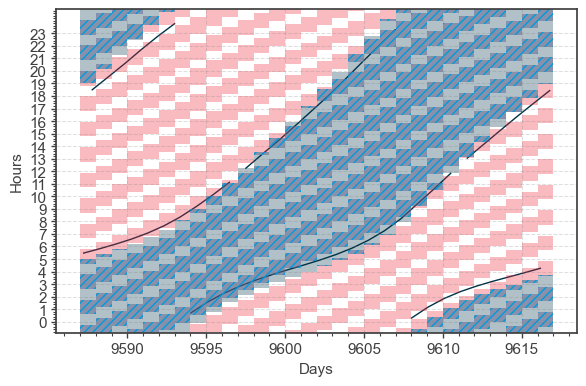

In [182]:
from godot.cosmos.show import Axes, Dimension

# Create axes of projection Time, Time

ax = Axes(projection=(Dimension.TIME, Dimension.TIME))

# Plot EventIntervalSets
ax.plot(moon_occult_e, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(NNSCBlocked, add_borders=True, ls=":", facealpha = 0.05)
ax.plot(ee, hatch="////", add_borders=True, ls=":", facealpha = 1)
plt.yticks(np.arange(24))
plt.xlabel("Days")
plt.ylabel("Hours")
plt.show()